In [16]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp

      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [4]:
# https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

In [9]:
labels = ["label", "context"]
contexts = pd.read_csv("sample/smsspamcollection/SMSSpamCollection", sep="\t", names=labels)

In [10]:
contexts.head()

,label,context
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
contexts.describe()

,label,context
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
contexts.groupby('label').describe()

context                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
contexts['size'] = contexts['context'].apply(len)

In [14]:
contexts.head()

,label,context,size
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
contexts.describe()

,size
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


<AxesSubplot:ylabel='Frequency'>

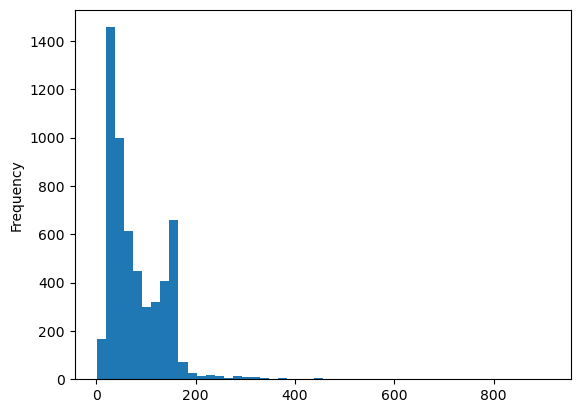

In [20]:
contexts['size'].plot.hist(bins=50)

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

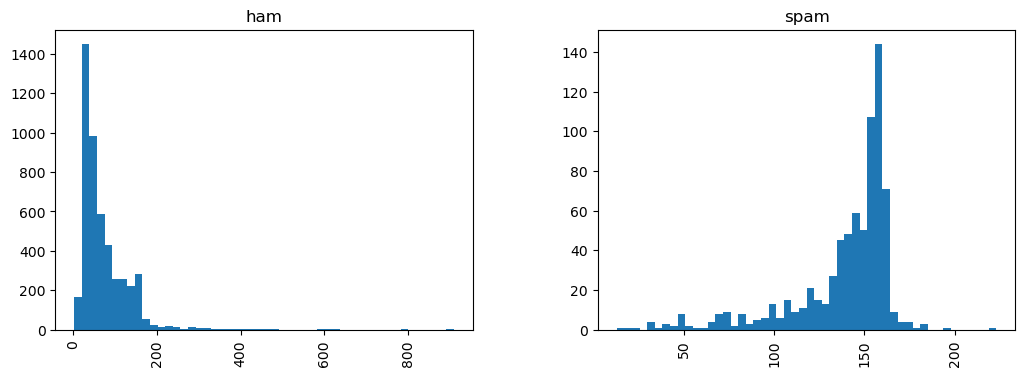

In [22]:
contexts.hist(column='size', by='label', bins=50, figsize=(12,4))

# Preprocessing

In [31]:
import string

In [32]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
sample_context = "There are too many spams in my email! I hate these spam!!"

In [42]:
cleaned_ch = [ch for ch in sample_context if not ch in string.punctuation]

In [43]:
cleaned_context = "".join(cleaned_ch)

In [44]:
print(cleaned_context)

There are too many spams in my email I hate these spam


In [25]:
from nltk.corpus import stopwords

In [26]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'them', 'am', 'so', 'had', 'were', 'did', 'aren', 'has', 'mightn', 'herself', 'against', 'her', "haven't", "you'd", 'as', 'now', 'shan', 'it', 'ain', 'will', 'me', "shan't", 'mustn', 'how', 'below', 'off', 'from', "doesn't", 'yours', 'into', 'don', 'him', 'wouldn', 'some', 'between', 'which', 's', "wasn't", 'too', 'are', 'there', 'above', "you'll", "you're", 'such', 'himself', 'doing', 'doesn', 'hers', 'after', 'until', 'about', 'we', 'through', 'in', 'they', 'their', 'have', 'shouldn', 'theirs', 'each', 'didn', 'any', "hasn't", 'while', 'your', 'over', 'where', 'themselves', 'is', 'she', 'because', 'itself', 'these', 'hadn', 'a', 'own', 'won', 'can', 'than', 'here', 't', 'again', 'nor', 'couldn', 'very', 'do', 'should', 'by', 'd', 'all', 'when', 'having', 'no', 'he', 'up', "don't", "that'll", "won't", 'yourselves', "she's", 'this', 'ourselves', "it's", 'both', 'further', "should've", 'ours', 'once', 'same', 'haven', 'yourself', 'on', 'been', 'if', 'was', 'of', "mightn't", "mustn't", 

In [46]:
cleaned_words = cleaned_context.split()

In [47]:
cleaned_words

['There',
 'are',
 'too',
 'many',
 'spams',
 'in',
 'my',
 'email',
 'I',
 'hate',
 'these',
 'spam']

In [49]:
filtered_words = list(filter(lambda word: word.lower() not in stop_words, cleaned_words))

In [50]:
filtered_words

['many', 'spams', 'email', 'hate', 'spam']

In [51]:
def preprocessing(context: str) -> str:
    cleaned_ch = [ch for ch in context if not ch in string.punctuation]
    cleaned_context = "".join(cleaned_ch)
    cleaned_words = cleaned_context.split()
    filtered_words = list(filter(lambda word: word.lower() not in stop_words, cleaned_words))
    return filtered_words

In [52]:
contexts['context'].head(5).apply(preprocessing)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: context, dtype: object

## What is CountVectorizer?
CountVectorizer: convert a collection of text documents to a matrix of token (words, terms etc.) counts

 - It tokenizes the text along with performing very basic preprocessing. This preprocessing includes converting all the text to lowercase and removing punctuation.
 - It builds a dictionary of features and transforms documents to feature vectors.

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
# CountVectorizer: convert a collection of text documents to a matrix of token (words, terms etc.) counts
# 1.It tokenizes the text along with performing very basic preprocessing. 
# This preprocessing includes converting all the text to lowercase and removing punctuation.
# 2. It builds a dictionary of features and transforms documents to feature vectors.

In [77]:
# create a corpus of sentences
corpus = [
    "Hello, this is a sentence",
    "This is another sentence",
    "Third document is here"
]

vectorizer = CountVectorizer()

In [78]:
# tokenize and build vocabulary
vectorizer.fit(corpus)

CountVectorizer()

In [79]:
# summarize
vectorizer.vocabulary_

{'hello': 2,
 'this': 7,
 'is': 4,
 'sentence': 5,
 'another': 0,
 'third': 6,
 'document': 1,
 'here': 3}

In [81]:
# encode document
vector = vectorizer.transform(corpus)

In [103]:
print(vector)

  (0, 2)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (1, 0)	1
  (1, 4)	1
  (1, 5)	1
  (1, 7)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (2, 6)	1


In [82]:
# summarize encoded vector
print(vector.toarray())

[[0 0 1 0 1 1 0 1]
 [1 0 0 0 1 1 0 1]
 [0 1 0 1 1 0 1 0]]


# Apply our example

In [88]:
bow_tf = CountVectorizer(analyzer=preprocessing).fit(contexts['context'])

In [89]:
bow_tf.vocabulary_

{'Go': 2060,
 'jurong': 7555,
 'point': 8917,
 'crazy': 5769,
 'Available': 1110,
 'bugis': 5218,
 'n': 8336,
 'great': 6937,
 'world': 11163,
 'la': 7668,
 'e': 6217,
 'buffet': 5217,
 'Cine': 1483,
 'got': 6906,
 'amore': 4653,
 'wat': 10965,
 'Ok': 3064,
 'lar': 7701,
 'Joking': 2451,
 'wif': 11072,
 'u': 10698,
 'oni': 8590,
 'Free': 1941,
 'entry': 6331,
 '2': 423,
 'wkly': 11123,
 'comp': 5619,
 'win': 11084,
 'FA': 1833,
 'Cup': 1551,
 'final': 6557,
 'tkts': 10512,
 '21st': 443,
 'May': 2804,
 '2005': 430,
 'Text': 3953,
 '87121': 871,
 'receive': 9252,
 'questionstd': 9159,
 'txt': 10686,
 'rateTCs': 9200,
 'apply': 4731,
 '08452810075over18s': 73,
 'U': 4068,
 'dun': 6204,
 'say': 9554,
 'early': 6222,
 'hor': 7186,
 'c': 5261,
 'already': 4629,
 'Nah': 2948,
 'dont': 6123,
 'think': 10433,
 'goes': 6877,
 'usf': 10799,
 'lives': 7842,
 'around': 4777,
 'though': 10450,
 'FreeMsg': 1943,
 'Hey': 2222,
 'darling': 5864,
 '3': 543,
 'weeks': 11011,
 'word': 11150,
 'back': 4893

In [91]:
len(bow_tf.vocabulary_)

11425

In [92]:
sample_context = contexts['context'][2]

In [93]:
sample_context

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [118]:
# encode document
sample_bow = bow_tf.transform([sample_context])

In [119]:
print(sample_bow)

  (0, 73)	1
  (0, 423)	1
  (0, 430)	1
  (0, 443)	1
  (0, 871)	1
  (0, 1551)	1
  (0, 1833)	2
  (0, 1941)	1
  (0, 2804)	1
  (0, 3953)	1
  (0, 4731)	1
  (0, 5619)	1
  (0, 6331)	2
  (0, 6557)	1
  (0, 9159)	1
  (0, 9200)	1
  (0, 9252)	1
  (0, 10512)	1
  (0, 10686)	1
  (0, 11084)	1
  (0, 11123)	1


In [120]:
sample_bow.shape

(1, 11425)

In [121]:
bow_tf.get_feature_names_out()[1833]

'FA'

In [107]:
bow_contexts = bow_tf.transform(contexts['context'])

In [108]:
print(bow_contexts.shape)

(5572, 11425)


In [155]:
# non zero occurrence
non_zero_occurrence = bow_contexts.nnz

In [156]:
# sparsity
sparsity = 1.0 - (non_zero_occurrence / (bow_contexts.shape[0] * bow_contexts.shape[1]))

In [157]:
sparsity

0.9992059704587332

# TFIDF

In [116]:
from sklearn.feature_extraction.text import TfidfTransformer

In [117]:
tfidf_tf = TfidfTransformer().fit(bow_contexts)

In [122]:
sample_tfidf = tfidf_tf.transform(sample_bow)

In [125]:
# get the weight of word
print(sample_tfidf)

  (0, 11123)	0.19104387220509106
  (0, 11084)	0.15898145347176754
  (0, 10686)	0.13995540820792943
  (0, 10512)	0.2118842499614227
  (0, 9252)	0.16121646071144807
  (0, 9200)	0.22538631044314436
  (0, 9159)	0.22538631044314436
  (0, 6557)	0.18466951562322612
  (0, 6331)	0.347904654589528
  (0, 5619)	0.1887440015250524
  (0, 4731)	0.16452475271486866
  (0, 3953)	0.1544015632869991
  (0, 2804)	0.17524194104333074
  (0, 1941)	0.1526581729225716
  (0, 1833)	0.4507726208862887
  (0, 1551)	0.2177823443125605
  (0, 871)	0.2118842499614227
  (0, 443)	0.2177823443125605
  (0, 430)	0.2177823443125605
  (0, 423)	0.09639170919810956
  (0, 73)	0.22538631044314436


In [128]:
tfidf_tf.idf_[bow_tf.vocabulary_['FA']]

8.527076498901426

In [129]:
contexts_tfidf = tfidf_tf.transform(bow_contexts)

# Classifier

In [130]:
from sklearn.naive_bayes import MultinomialNB

In [132]:
spam_detector = MultinomialNB().fit(contexts_tfidf, contexts['label'])

In [134]:
spam_detector.predict(sample_tfidf)

array(['spam'], dtype='<U4')

In [136]:
# compare what it is with correct data
contexts['label'][2]

'spam'

In [137]:
total_pred = spam_detector.predict(contexts_tfidf)

In [138]:
total_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

# Pipeline

A Pipeline in Scikit-learn is a tool for streamlining a lot of the routine processes, encapsulating little pieces of the whole processing sequence of a data set, and improving the whole process of modeling and coding

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
c_train, c_test, l_train, l_test = train_test_split(
    contexts['context'],
    contexts['label'],
    test_size=0.3,
    random_state=42)

In [142]:
from sklearn.pipeline import Pipeline

In [143]:
pl = Pipeline([
    ('bow', CountVectorizer(analyzer=preprocessing)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [144]:
pl.fit(c_train, l_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function preprocessing at 0x7fe079328d30>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [145]:
predictions = pl.predict(c_test)

In [146]:
from sklearn.metrics import classification_report

In [147]:
print(classification_report(l_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.73      0.85       224

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.96      0.96      1672

